## Principal Component Analysis (PCA) - Lab Enhancement
### 

Created by Ahmad Luqman (1211101384).
___

### **Introduction to PCA**

1. **_What is PCA?_**

    Principal Component Analysis (PCA) is a linear dimensionality reduction technique used to transform high-dimensional datasets into lower-dimensional representations while preserving as much variance (information) as possible. This is achieved by finding new axes (principal components) that best capture the variance in the data.

    In simpler terms, PCA helps reduce the number of variables while keeping the most important information intact. It is often used when:
    - Data has too many features, making it difficult to visualize or analyze.
    - Features are highly correlated, leading to redundancy.
    - There is a need to improve computational efficiency.


2. **_Why is PCA Important?_**

    
    **a. Curse of Dimensionality**  
    When datasets have a large number of features, many machine learning algorithms struggle because:
    - Training time increases exponentially.
    - High-dimensional data can cause models to overfit.
    - Too many features introduce noise, making it harder to learn meaningful patterns.

    PCA mitigates this problem by reducing feature dimensionality, making it easier to process, visualize, and interpret.

    **b. Correlated Features and Redundancy**  
    Many real-world datasets contain correlated features. For example, in medical diagnostics, tumor size and perimeter might be highly correlated, meaning they provide similar information. PCA identifies these correlations and creates new features (principal components) that capture this redundancy, reducing the dataset’s complexity.


### **Advantages of PCA**   
PCA is widely used because it offers multiple benefits:

1. **_Reduces Computational Cost_**  
In high-dimensional datasets, training machine learning models is slow. PCA reduces the number of features, making training faster and less resource-intensive.

2. **_Handles Multicollinearity_**  
Many machine learning models (like linear regression) perform poorly when features are highly correlated. PCA eliminates this problem by transforming correlated features into uncorrelated principal components.

3. **_Improves Model Performance_**  
By removing noise and redundant features, PCA can enhance accuracy.
    - Example: In genomics, where thousands of gene expressions exist, PCA helps focus on the most significant genetic markers.

4. **_Helps in Visualization_**  
PCA allows visualization of high-dimensional data in 2D or 3D, making it easier to understand relationships in data.

5. **_Reduces Overfitting_**  
PCA prevents overfitting by removing unnecessary features that do not contribute significantly to the target variable.

### **Disadvantages of PCA**  
While PCA is powerful, it has limitations:

1. **_Loss of Interpretability_**  
Principal components do not have direct real-world meaning.
    - Example: In the PCA Lab of breast cancer dataset, instead of "Tumor Radius," PCA outputs "Principal Component 1," which is harder to interpret.

2. **_Assumes Linearity_**  
PCA assumes that data is linearly correlated. It does not work well with non-linear data (e.g., facial recognition, speech analysis).

3. **_Sensitive to Scaling_**  
If data is not normalized, features with larger values dominate.
    - Solution: Always standardize data before applying PCA.

4. **_Can Discard Useful Information_**  
If too many components are removed, valuable information might be lost.
    - Example: In medical datasets, reducing too many dimensions might eliminate key diagnostic markers.

### **Uses of PCA in Machine Learning**
PCA is useful in various machine learning applications:

1. **_Preprocessing Before Machine Learning_**  
    PCA removes noise, leading to better model performance. Used in SVM, Logistic Regression, Decision Trees.

2. **_Feature Engineering_**  
    Helps in creating new feature sets from raw data.
 
3. **_Noise Reduction_**  
    PCA extracts key patterns and removes noise from data.

4. **_Data Visualization_**  
    PCA allows complex datasets to be plotted in 2D or 3D.

### **Example of Real-World Applications of PCA**
PCA is widely used across multiple industries:

1. 🏥 **Healthcare**  
    - Breast Cancer Diagnosis: PCA helps identify key tumor features in medical imaging.  
    - Genomics: PCA reduces dimensions in gene expression data.

2. 📸 **Image Processing**  
    - Facial Recognition: PCA-based Eigenfaces method for recognizing human faces.  
    - Object Detection: PCA extracts key features from CIFAR-10.

3. 🕵 **Cybersecurity**  
    - Phishing Detection: PCA improves malicious website classification.  
    - Intrusion Detection: Identifies unusual network patterns.

4. 📈 **Finance & Stock Market**  
    - Portfolio Optimization: PCA finds correlated stocks to minimize risks.  
    - Fraud Detection: Detects anomalies in transactions.

## **PCA Implementation of Real World Dataset**
### _Phishing Detection with PCA_

PhisUSIIL Dataset is taken from  UC Irvine Machine Learning Repository (https://archive.ics.uci.edu/dataset/967/phiusiil%2Bphishing%2Burl%2Bdataset)

#### About the Dataset
... 235795 set of data, however because of this device computational limitation, we only use 5000 of it.

### **1. Importing the library**

In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### **2. Load the data & Inspect the Dataset**

In [37]:
# Load dataset
file_path = "currency_exchange_rates_02-01-1995_-_02-05-2018.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

# Display basic info about the phish_dataset
print(df.info())

# Display the data types
print(df.dtypes)

df

       Date  Algerian Dinar  Australian Dollar  Bahrain Dinar  Bolivar Fuerte  \
0  1995-1-2             NaN                NaN            NaN             NaN   
1  1995-1-3             NaN                NaN          0.376             NaN   
2  1995-1-4             NaN             0.7704          0.376             NaN   
3  1995-1-5             NaN             0.7693          0.376             NaN   
4  1995-1-6             NaN             0.7699          0.376             NaN   

   Botswana Pula  Brazilian Real  Brunei Dollar  Canadian Dollar  \
0            NaN             NaN            NaN              NaN   
1            NaN           0.843            NaN           1.4035   
2            NaN           0.844            NaN           1.4026   
3            NaN           0.844            NaN           1.4002   
4            NaN           0.842            NaN           1.4002   

   Chilean Peso  ...  South African Rand  Sri Lanka Rupee  Swedish Krona  \
0           NaN  ...        

,Date,Algerian Dinar,Australian Dollar,Bahrain Dinar,Bolivar Fuerte,Botswana Pula,Brazilian Real,Brunei Dollar,Canadian Dollar,Chilean Peso,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,U.K. Pound Sterling,U.S. Dollar
0,1995-1-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1995-1-3,NaN,NaN,0.376,NaN,NaN,0.8430,NaN,1.4035,NaN,...,3.55000,50.0400,7.4588,1.3168,25.100,5.8750,NaN,3.6710,1.56170,1.0
2,1995-1-4,NaN,0.7704,0.376,NaN,NaN,0.8440,NaN,1.4026,NaN,...,3.56000,50.0700,7.4480,1.3161,25.130,5.8738,NaN,3.6710,1.56050,1.0
3,1995-1-5,NaN,0.7693,0.376,NaN,NaN,0.8440,NaN,1.4002,NaN,...,3.55000,50.0700,7.4450,1.3080,25.140,5.8700,NaN,3.6710,1.56100,1.0
4,1995-1-6,NaN,0.7699,0.376,NaN,NaN,0.8420,NaN,1.4002,NaN,...,3.56000,50.0700,NaN,1.3040,25.130,5.8810,NaN,3.6710,1.56450,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5973,2018-4-26,114.8506,0.7574,0.376,66770.1562,0.1023,3.4971,1.3274,1.2862,603.31,...,12.40640,157.4628,8.5481,0.9835,31.595,6.7842,2.42955,3.6725,1.39655,1.0
5974,2018-4-27,115.0604,0.7545,0.376,66770.1562,0.1020,3.4670,1.3269,NaN,603.31,...,NaN,157.6459,8.6911,0.9907,31.617,6.7572,2.43120,3.6725,1.37685,1.0
5975,2018-4-30,114.8873,0.7570,0.376,68827.5000,0.1023,3.4805,1.3238,1.2836,605.74,...,12.43145,157.6459,8.6774,0.9894,31.510,6.7393,2.43190,3.6725,1.37250,1.0
5976,2018-5-1,NaN,0.7540,0.376,NaN,NaN,NaN,NaN,NaN,610.98,...,NaN,157.4737,NaN,NaN,NaN,6.7385,NaN,3.6725,1.36945,1.0


### **3. Data Preprocessing** 
Before applying PCA, we need to clean and prepare the data.

- #### **Remove Unnecessary Columns**  
    From the dataset description, the "FILENAME" column can be ignored.

In [38]:
# Drop Date and U.S. Dollar column (since U.S. Dollar = 1)
df = df.drop(columns=["Date", "U.S. Dollar"], errors="ignore")

# Display dataset shape after removing unnecessary columns
print("Dataset shape after removing USD column:", df.shape)

# Check the remaining columns
print(df .columns)

Dataset shape after removing USD column: (5978, 50)
Index(['Algerian Dinar', 'Australian Dollar', 'Bahrain Dinar',
       'Bolivar Fuerte', 'Botswana Pula', 'Brazilian Real', 'Brunei Dollar',
       'Canadian Dollar', 'Chilean Peso', 'Chinese Yuan', 'Colombian Peso',
       'Czech Koruna', 'Danish Krone', 'Euro', 'Hungarian Forint',
       'Icelandic Krona', 'Indian Rupee', 'Indonesian Rupiah', 'Iranian Rial',
       'Israeli New Sheqel', 'Japanese Yen', 'Kazakhstani Tenge', 'Korean Won',
       'Kuwaiti Dinar', 'Libyan Dinar', 'Malaysian Ringgit', 'Mauritian Rupee',
       'Mexican Peso', 'Nepalese Rupee', 'New Zealand Dollar',
       'Norwegian Krone', 'Nuevo Sol', 'Pakistani Rupee', 'Peso Uruguayo',
       'Philippine Peso', 'Polish Zloty', 'Qatar Riyal', 'Rial Omani',
       'Russian Ruble', 'Saudi Arabian Riyal', 'Singapore Dollar',
       'South African Rand', 'Sri Lanka Rupee', 'Swedish Krona', 'Swiss Franc',
       'Thai Baht', 'Trinidad And Tobago Dollar', 'Tunisian Dinar',
  

- ### **Handle Missing Value**

    Check for missing values and fill them with the previous day's rate.
    - Forward Fill (ffill) - When missing values are randomly spread in the dataset (Keeps time-series continuity)
    - Mean Imputation (fillna(df.mean())) - When early missing values are common (Fills early missing values consistently)

    Missing values are filled using the last available exchange rate.


In [39]:
# Check missing values
print("Missing values before handling:\n", df.isnull().sum().sum())

# Fill missing values using forward fill (previous day's value)
df.fillna(method="ffill", inplace=True)

# Fill any remaining missing values with column mean
df.fillna(df.mean(), inplace=True)

# Verify no missing values remain
print("Missing values after handling:", df.isnull().sum().sum())

df


Missing values before handling:
 61189
Missing values after handling: 0


C:\Users\user\AppData\Local\Temp\ipykernel_26088\259691856.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


,Algerian Dinar,Australian Dollar,Bahrain Dinar,Bolivar Fuerte,Botswana Pula,Brazilian Real,Brunei Dollar,Canadian Dollar,Chilean Peso,Chinese Yuan,...,Singapore Dollar,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,U.K. Pound Sterling
0,89.981933,0.768176,0.376,1013.247533,0.20111,2.158825,1.506478,1.265955,540.072629,7.472597,...,1.50305,8.077841,102.240029,7.731424,1.210862,35.233153,6.309243,1.830242,3.672307,1.614627
1,89.981933,0.768176,0.376,1013.247533,0.20111,0.843000,1.506478,1.403500,540.072629,7.472597,...,1.45630,3.550000,50.040000,7.458800,1.316800,25.100000,5.875000,1.830242,3.671000,1.561700
2,89.981933,0.770400,0.376,1013.247533,0.20111,0.844000,1.506478,1.402600,540.072629,7.472597,...,1.45370,3.560000,50.070000,7.448000,1.316100,25.130000,5.873800,1.830242,3.671000,1.560500
3,89.981933,0.769300,0.376,1013.247533,0.20111,0.844000,1.506478,1.400200,540.072629,7.472597,...,1.45200,3.550000,50.070000,7.445000,1.308000,25.140000,5.870000,1.830242,3.671000,1.561000
4,89.981933,0.769900,0.376,1013.247533,0.20111,0.842000,1.506478,1.400200,540.072629,7.472597,...,1.45270,3.560000,50.070000,7.445000,1.304000,25.130000,5.881000,1.830242,3.671000,1.564500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5973,114.850600,0.757400,0.376,66770.156200,0.10230,3.497100,1.327400,1.286200,603.310000,6.335200,...,1.32740,12.406400,157.462800,8.548100,0.983500,31.595000,6.784200,2.429550,3.672500,1.396550
5974,115.060400,0.754500,0.376,66770.156200,0.10200,3.467000,1.326900,1.286200,603.310000,6.340700,...,1.32690,12.406400,157.645900,8.691100,0.990700,31.617000,6.757200,2.431200,3.672500,1.376850
5975,114.887300,0.757000,0.376,68827.500000,0.10230,3.480500,1.323800,1.283600,605.740000,6.340700,...,1.32380,12.431450,157.645900,8.677400,0.989400,31.510000,6.739300,2.431900,3.672500,1.372500
5976,114.887300,0.754000,0.376,68827.500000,0.10230,3.480500,1.323800,1.283600,610.980000,6.340700,...,1.32380,12.431450,157.473700,8.677400,0.989400,31.510000,6.738500,2.431900,3.672500,1.369450


- #### **Set the Target Variable**
    We need to predict the exchange rate of a currency (e.g., EUR/USD for tomorrow).

In [40]:
# Create the target variable (EUR exchange rate for next day)
df["EUR_tomorrow"] = df["Euro"].shift(-1)

# Drop the last row since it has no target value
df.dropna(inplace=True)

- ### **Standardize Featuress** 
    PCA is sensitive to different feature scales, so we normalize the features.  
    PCA works best when features are standardized (mean = 0, variance = 1).

    Scaling happens only on X_original, not including EUR_tomorrow.

In [41]:
# Define features (excluding EUR_tomorrow)
X_original = df.drop(columns=["EUR_tomorrow"])  # Use all currency rates

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# Define target
y = df["EUR_tomorrow"].values  # Target: Tomorrow's EUR/USD rate

# Print the shape of scaled data
print("Scaled dataset shape:", X_scaled.shape)


Scaled dataset shape: (5977, 50)


### **4. Train a Machine Learning Model (Baseline)** 
Before applying PCA, we first train a baseline model using the original dataset.

- #### **Train a Linear Regression Model (Without PCA)**
    Let's first train Linear Regression on the original dataset before applying PCA.

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Split data into train and test sets
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
print(f"📌 Mean Absolute Error (Without PCA): {mae:.6f}")


📌 Mean Absolute Error (Without PCA): 0.004625


- #### **Visualize Scatter Plot for Training & Test Data (Without PCA)**

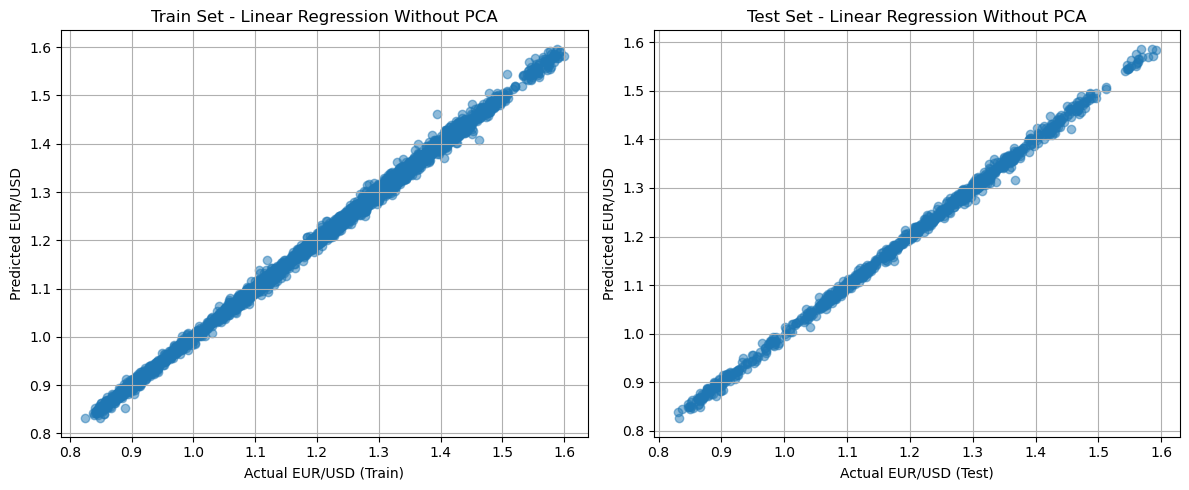

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Scatter plot of training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, model.predict(X_train), alpha=0.5)
plt.xlabel("Actual EUR/USD (Train)")
plt.ylabel("Predicted EUR/USD")
plt.title("Train Set - Linear Regression Without PCA")
plt.grid(True)

# Scatter plot of test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual EUR/USD (Test)")
plt.ylabel("Predicted EUR/USD")
plt.title("Test Set - Linear Regression Without PCA")
plt.grid(True)

plt.tight_layout()
plt.show()

Here is the cumulative variance of all principal component

here we can see with only 2 PC we get more than 60% of the prediction

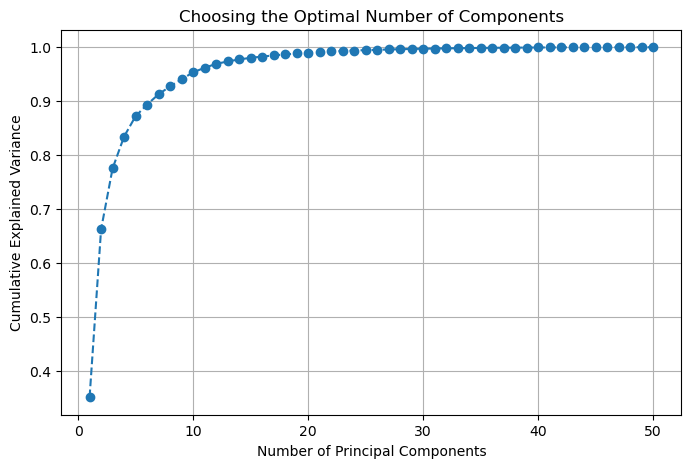

In [47]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Apply PCA without specifying components (to analyze explained variance)
pca = PCA()
pca.fit(X_scaled)

# Calculate cumulative variance explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker="o", linestyle="--")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Choosing the Optimal Number of Components")
plt.grid()
plt.show()


- ### **Train Linear Regression WITH PCA (Using Only PC1 & PC2)**
    Let's reduce 50 currencies 2 into principal components.

In [45]:
from sklearn.decomposition import PCA

# Apply PCA (retain 95% variance)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split into train & test sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train_pca)

# Predict on test set
y_pred_pca = model_pca.predict(X_test_pca)

# Evaluate performance
mae_pca = mean_absolute_error(y_test_pca, y_pred_pca)
print(f"📌 Mean Absolute Error (With PCA - Using Only PC1 & PC2): {mae_pca:.6f}")

# Print new shape
print(f"Original Features: {X_scaled.shape[1]}, Reduced Features: {X_pca.shape[1]}")

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance per component:", explained_variance)

📌 Mean Absolute Error (With PCA - Using Only PC1 & PC2): 0.056252
Original Features: 50, Reduced Features: 2
Explained variance per component: [0.35109606 0.31124194]


### **5. To compare all accuracy metrics for the models with and without PCA, we will:**

1. Evaluate both models using multiple metrics: 
    - Mean Absolute Error (MAE) → Measures absolute error size.
    - Mean Squared Error (MSE) → Penalizes larger errors.
    - Root Mean Squared Error (RMSE) → Square root of MSE.
    - R² Score (R-squared) → Measures model goodness-of-fit (higher is better).
2. Create a table to compare results.
2. Visualize the error distribution to see how predictions deviate from actual values.

#### 📌 Step 1: Compute Accuracy Metrics  
Modify the existing evaluation code to calculate all metrics.

#### ✅ What This Table Shows:

- Lower MAE & MSE = Better predictions  
- Higher R² score = Model explains more variance  
- If PCA doesn't lose too much accuracy, it's useful for dimensionality reduction.  

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate errors for Without PCA model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate errors for With PCA model (PC1 & PC2)
mae_pca = mean_absolute_error(y_test_pca, y_pred_pca)
mse_pca = mean_squared_error(y_test_pca, y_pred_pca)
r2_pca = r2_score(y_test_pca, y_pred_pca)


#### 📌 Step 2: Visualize Accuracy Comparison  
We can plot a bar chart comparing MAE, MSE, and R² for models with and without PCA.

c:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


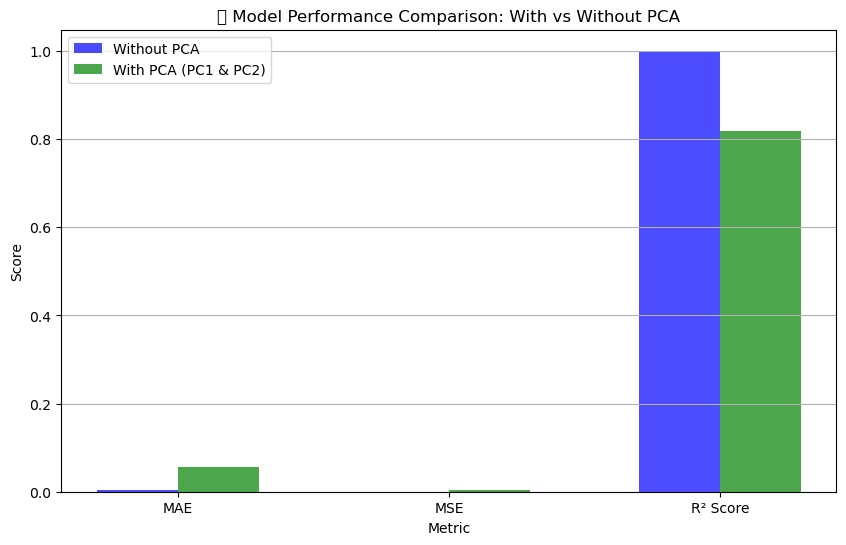

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Labels and values
metrics = ["MAE", "MSE", "R² Score"]
values_without_pca = [mae, mse, r2]
values_with_pca = [mae_pca, mse_pca, r2_pca]

x = np.arange(len(metrics))  # X-axis positions

plt.figure(figsize=(10, 6))
plt.bar(x - 0.15, values_without_pca, width=0.3, label="Without PCA", color="blue", alpha=0.7)
plt.bar(x + 0.15, values_with_pca, width=0.3, label="With PCA (PC1 & PC2)", color="green", alpha=0.7)

plt.xticks(x, metrics)
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("📊 Model Performance Comparison: With vs Without PCA")
plt.legend()
plt.grid(axis="y")

plt.show()


#### 📌 Step 3: Visualize Actual vs. Predicted Exchange Rates

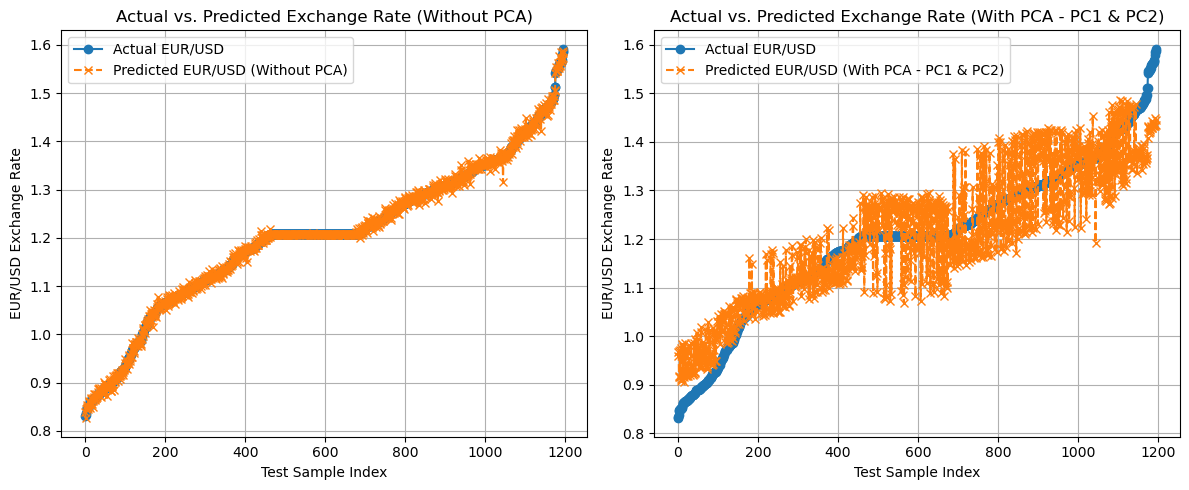

In [54]:
# Sort indices for better visualization
sorted_indices = np.argsort(y_test)
y_test_sorted = y_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

sorted_indices_pca = np.argsort(y_test_pca)
y_test_sorted_pca = y_test_pca[sorted_indices_pca]
y_pred_sorted_pca = y_pred_pca[sorted_indices_pca]

plt.figure(figsize=(12, 5))

# Original Model (Without PCA)
plt.subplot(1, 2, 1)
plt.plot(y_test_sorted, label="Actual EUR/USD", linestyle="-", marker="o")
plt.plot(y_pred_sorted, label="Predicted EUR/USD (Without PCA)", linestyle="--", marker="x")
plt.xlabel("Test Sample Index")
plt.ylabel("EUR/USD Exchange Rate")
plt.title("Actual vs. Predicted Exchange Rate (Without PCA)")
plt.legend()
plt.grid(True)

# PCA Model (Using PC1 & PC2)
plt.subplot(1, 2, 2)
plt.plot(y_test_sorted_pca, label="Actual EUR/USD", linestyle="-", marker="o")
plt.plot(y_pred_sorted_pca, label="Predicted EUR/USD (With PCA - PC1 & PC2)", linestyle="--", marker="x")
plt.xlabel("Test Sample Index")
plt.ylabel("EUR/USD Exchange Rate")
plt.title("Actual vs. Predicted Exchange Rate (With PCA - PC1 & PC2)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
